In [1]:
import pandas as pd
import numpy as np
import cx_Oracle
import os
import json
import datetime
import warnings

warnings.filterwarnings(action="ignore")
from selenium import webdriver
from selenium.webdriver.support.ui import Select
from selenium.webdriver.common.by import By
import bs4
import requests
import time
import math
import random
from shapely.geometry import Point, Polygon
import time as timesys
from pyproj import Geod
from haversine import haversine
pd.set_option('display.max_columns', None)

In [2]:
tianjin = '117.4961975657171,37.86803012379458,7.296245301137998 119.8081837995413,37.9250916349774,-34.2681049860788 119.8416643486643,39.32481316399956,-31.12524274095152 117.9501096884913,39.37523731857854,39.41212136434525 117.4961975657171,37.86803012379458,7.296245301137998'



coord_list = tianjin.split(" ")
coord_list
coord_list2 = []
for i in coord_list:
    temp = i.split(",")[:2]
    temp = list(map(float, temp))
    coord_list2.append(temp)
poly = Polygon(coord_list2)
# if Point(LONGITUDE, LATITUDE).within(poly):

In [3]:
df_test = pd.read_csv("voy_path/COSCO_FOS_VRKR6_23.csv")
df_test

,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption
0,COSCO FOS,477947700,9484302.0,4253,CNTSN,2022-10-24 10:30:00,126.4686,34.1041,17.7,286.0,2022-10-23 21:31:35.498957,2022-10-23 12:31:04,2022-10-23 09:31:08,under way using engine,235.852516,441.577157
1,COSCO FOS,477947700,9484302.0,4253,CNTSN,2022-10-24 10:30:00,126.4381,34.1089,17.4,273.0,2022-10-23 21:36:38.494959,2022-10-23 12:36:23,2022-10-23 09:31:08,under way using engine,238.184921,436.415634
2,COSCO FOS,477947700,9484302.0,4253,CNTSN,2022-10-24 10:30:00,126.4096,34.1100,17.6,270.0,2022-10-23 21:41:41.162039,2022-10-23 12:41:16,2022-10-23 09:31:08,under way using engine,240.527495,447.093656
3,COSCO FOS,477947700,9484302.0,4253,CNTSN,2022-10-24 10:30:00,126.3837,34.1103,17.7,270.0,2022-10-23 21:46:43.859572,2022-10-23 12:45:40,2022-10-23 09:31:08,under way using engine,242.692568,454.383511
4,COSCO FOS,477947700,9484302.0,4253,CNTSN,2022-10-24 10:30:00,126.3504,34.1106,17.7,271.0,2022-10-23 21:51:46.488472,2022-10-23 12:51:17,2022-10-23 09:31:08,under way using engine,245.485649,459.612884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-28 01:50:00,128.8280,35.0775,0.1,91.0,2022-10-28 15:11:35.771388,2022-10-28 06:07:58,2022-10-28 06:07:05,under way using engine,12.023183,959.355393
497,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-28 01:50:00,128.8281,35.0774,0.1,91.0,2022-10-28 15:21:41.415499,2022-10-28 06:19:08,2022-10-28 06:19:07,under way using engine,12.012681,958.517377
498,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-28 01:50:00,128.8278,35.0776,0.0,91.0,2022-10-28 16:37:24.932444,2022-10-28 07:35:27,2022-10-28 07:31:07,under way using engine,12.033115,NaN
499,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-10-28 01:50:00,128.8280,35.0773,0.1,91.0,2022-10-28 18:13:18.843610,2022-10-28 09:09:53,2022-10-28 09:07:06,under way using engine,12.000991,957.584631


In [4]:
# if Point(LONGITUDE, LATITUDE).within(poly):

In [5]:
df_test.sort_values(by="timestamp", ignore_index=True, inplace=True)

In [6]:
for idx in df_test.index:
    LONGITUDE = df_test.loc[idx, "longitude"]
    LATITUDE = df_test.loc[idx, "latitude"]
    heading = df_test.loc[idx, "heading"]
    speed = df_test.loc[idx, "speed"]
    if Point(LONGITUDE, LATITUDE).within(poly) and heading < 200 and speed > 11:
        print(idx)
        break
        

244


In [7]:
df_test_2 = df_test.loc[idx:,]
df_test_2.reset_index(inplace=True)

In [8]:
# df_test_2.to_csv("voy_path/COSCO_test.csv", encoding="utf-8 sig", header=True, index=False)

In [9]:
distance = 0
for idx in df_test_2.index:
    if idx != 0:
        LONGITUDE = df_test_2.loc[idx, "longitude"]
        LATITUDE = df_test_2.loc[idx, "latitude"]
        current_coord = (LATITUDE, LONGITUDE)

        LONGITUDE = df_test_2.loc[idx - 1, "longitude"]
        LATITUDE = df_test_2.loc[idx - 1, "latitude"]
        previous_current_coord = (LATITUDE, LONGITUDE)

        distance += haversine(current_coord, previous_current_coord, unit="km")

In [10]:
distance

1327.2648556008742

In [11]:
1348.5265119662952 / 20

67.42632559831476

In [12]:
overall_length = 1348.5265119662952
segment_length = overall_length/20

In [13]:
overall_length = distance
segment_length = overall_length/20

In [14]:
segment_length

66.3632427800437

In [15]:
temp_accu_length = 0
segmenting_index_list = []
for idx in df_test_2.index:
    
    if idx == 0:
        previous_length = 0
    else:
        LONGITUDE = df_test_2.loc[idx, "longitude"]
        LATITUDE = df_test_2.loc[idx, "latitude"]
        current_coord = (LATITUDE, LONGITUDE)

        LONGITUDE = df_test_2.loc[idx - 1, "longitude"]
        LATITUDE = df_test_2.loc[idx - 1, "latitude"]
        previous_current_coord = (LATITUDE, LONGITUDE)

        current_length = haversine(current_coord, previous_current_coord, unit="km")
        temp_accu_length += current_length
        
        if temp_accu_length >= segment_length:
            print(temp_accu_length)
#             segmenting_index_list.append(idx)
            
            
            length_error_1 = temp_accu_length - segment_length
            length_error_2 = temp_accu_length - segment_length - previous_length
            if length_error_1 > length_error_2:
                segmenting_index_list.append(idx)
            else:
                segmenting_index_list.append(idx - 1)
                
            
            temp_accu_length = 0
            
        previous_length = current_length
segmenting_index_list.append(df_test_2.index[-1])


71.25276385840104
155.57462066089624
70.03386228298353
119.77110415166675
70.14662388272575
250.33181824752216
69.28310138292795
66.88959168849124
67.63446215935082
66.51581492613269
67.14454387285001
66.43842751596591
68.7589257030363
67.29825310725028


In [16]:
# df 내의 포인트 전체 길이 구하는 함수
def reckon_point_lengths(df_test_2):
    distance = 0
    df_test_2.reset_index(inplace=True, drop=True)
    for idx in df_test_2.index:
        if idx != 0:
            LONGITUDE = df_test_2.loc[idx, "longitude"]
            LATITUDE = df_test_2.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = df_test_2.loc[idx - 1, "longitude"]
            LATITUDE = df_test_2.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)

            distance += haversine(current_coord, previous_current_coord, unit="km")
    return distance

In [17]:
for idx, index in enumerate(segmenting_index_list):
    if idx == 0:
        d = df_test_2[0:index + 1]
#         display(d)
        distance = reckon_point_lengths(d)
        print(distance)
        d.to_csv(f"실험/segment_test_new_{idx}.csv", encoding="utf-8 sig", header=True, index=False)
    else:
        d = df_test_2[previous_index:index + 1]
#         display(d)
        distance = reckon_point_lengths(d)
        print(distance)
        d.to_csv(f"실험/segment_test_new_{idx}.csv", encoding="utf-8 sig", header=True, index=False)
        
    previous_index = index

71.25276385840104
155.57462066089624
70.03386228298353
119.77110415166675
70.14662388272575
250.33181824752216
69.28310138292795
66.88959168849124
67.63446215935082
66.51581492613269
67.14454387285001
66.43842751596591
68.7589257030363
67.29825310725028
50.190942160672996


In [18]:
for i in range(len(segmenting_index_list)):
    d = pd.read_csv(f"실험/segment_test_new_{i}.csv")
    mean_speed = d["speed"].mean()
    print(i, mean_speed)

0 16.742857142857144
1 19.575
2 16.94
3 17.788888888888888
4 17.78181818181818
5 17.7
6 18.31764705882353
7 19.400000000000002
8 20.638095238095236
9 18.0125
10 14.132
11 15.678571428571429
12 15.39655172413793
13 15.695833333333335
14 5.751282051282051


In [19]:
print("COSCO_FOS_24")
print("전항지 출항 시각",df_test_2.loc[df_test_2.index[0], "timestamp"])
print("부산 도착 시각",df_test_2.loc[df_test_2.index[-1], "timestamp"])

COSCO_FOS_24
전항지 출항 시각 2022-10-26 17:49:59.362708
부산 도착 시각 2022-10-28 19:34:04.022317


In [20]:
sample = pd.read_csv("voy_path/COSCO_FOS_VRKR6_25.csv")
sample.sort_values(by="timestamp", ignore_index=True, inplace=True)
for idx in sample.index:
    LONGITUDE = sample.loc[idx, "longitude"]
    LATITUDE = sample.loc[idx, "latitude"]
    heading = sample.loc[idx, "heading"]
    speed = sample.loc[idx, "speed"]
    if Point(LONGITUDE, LATITUDE).within(poly) and heading < 200 and speed > 11:
        print(idx)
        break
sample = sample.loc[idx:,]
sample.reset_index(inplace=True)


224


In [21]:
def cal_duration(speed, distance):
    hour = int(distance // km_h)
    minute = int(
        (distance / km_h - distance // km_h) * 60)
    duration = datetime.timedelta(hours=hour,minutes=minute)
    return duration

In [22]:
# 억까 방지
busan_berth = '128.7362432822305,34.91571835540296,5.941836244531453 128.8816505843355,34.93956159255044,9.088787041386029 128.8718190496849,35.09310779849003,8.308118991212194 128.7247817257968,35.08647052441917,-9.228016031556635 128.7362432822305,34.91571835540296,5.941836244531453'
coord_list = busan_berth.split(" ")
coord_list
coord_list2 = []
for i in coord_list:
    temp = i.split(",")[:2]
    temp = list(map(float, temp))
    coord_list2.append(temp)
poly_busan = Polygon(coord_list2)
# if Point(LONGITUDE, LATITUDE).within(poly):

In [23]:
# ATA 확인
def check_ATA(df_test):
    for i in df_test.index:
        LONGITUDE = df_test.loc[i, 'longitude']
        LATITUDE = df_test.loc[i, 'latitude']
        if Point(LONGITUDE, LATITUDE).within(poly_busan):    
            stop_index = i - 1
            break
            continue
    return stop_index

In [24]:
sample

,index,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption
0,224,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,117.8339,38.9635,11.5,101.0,2022-11-19 22:24:43.599696,2022-11-19 13:20:25,2022-11-19 01:07:06,under way using engine,1071.303386,1386.146465
1,225,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,117.8521,38.9608,11.6,102.0,2022-11-19 22:29:46.266674,2022-11-19 13:25:02,2022-11-19 01:07:06,under way using engine,1069.727209,1388.920303
2,226,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,117.8962,38.9541,11.5,101.0,2022-11-19 22:39:53.134121,2022-11-19 13:35:45,2022-11-19 01:31:06,under way using engine,1065.901997,1379.157672
3,227,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,117.9377,38.9484,11.6,102.0,2022-11-19 22:49:57.626655,2022-11-19 13:46:03,2022-11-19 01:49:08,under way using engine,1062.327066,1379.312051
4,228,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,117.9571,38.9454,11.6,102.0,2022-11-19 22:55:01.041397,2022-11-19 13:50:45,2022-11-19 01:49:08,under way using engine,1060.642543,1377.124888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,528,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,128.8286,35.0767,0.9,80.0,2022-11-21 18:05:52.289081,2022-11-21 08:45:01,2022-11-21 08:37:08,under way using engine,11.938104,105.884565
305,529,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,128.8303,35.0770,0.1,91.0,2022-11-21 20:12:03.039219,2022-11-21 10:46:03,2022-11-21 10:49:07,moored,11.983151,956.161110
306,530,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,128.8302,35.0772,0.0,91.0,2022-11-21 20:17:05.890117,2022-11-21 10:52:05,2022-11-21 10:55:06,moored,12.004568,NaN
307,531,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,128.8300,35.0772,0.0,91.0,2022-11-21 20:42:20.130436,2022-11-21 11:15:59,2022-11-21 11:13:06,moored,12.003097,NaN


In [25]:
stop_index = check_ATA(sample)

In [26]:
stop_index

295

In [27]:
sample.loc[stop_index:]

,index,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption
295,519,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,128.8326,34.9308,9.7,345.0,2022-11-21 16:50:10.106911,2022-11-21 07:29:14,2022-11-21 07:25:09,under way using engine,4.477744,5.594956
296,520,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,128.8316,34.9334,9.7,345.0,2022-11-21 16:55:12.370789,2022-11-21 07:30:20,2022-11-21 07:31:07,under way using engine,4.174799,5.216425
297,521,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,128.8109,34.9799,11.9,343.0,2022-11-21 17:10:24.772941,2022-11-21 07:46:50,2022-11-21 07:49:08,under way using engine,1.385139,1.818734
298,522,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,128.7941,35.0195,12.4,341.0,2022-11-21 17:20:26.867541,2022-11-21 08:00:05,2022-11-21 07:49:08,under way using engine,6.009961,8.060099
299,523,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,128.7889,35.0318,10.6,341.0,2022-11-21 17:25:29.125227,2022-11-21 08:04:23,2022-11-21 07:49:08,under way using engine,7.455118,9.412492
300,524,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,128.7868,35.0597,8.2,25.0,2022-11-21 17:35:35.996969,2022-11-21 08:15:14,2022-11-21 08:13:09,under way using engine,10.450602,13.357489
301,525,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,128.7908,35.0657,8.0,53.0,2022-11-21 17:40:38.692701,2022-11-21 08:18:19,2022-11-21 08:13:09,under way using engine,10.999747,14.165268
302,526,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,128.8049,35.0702,7.1,75.0,2022-11-21 17:45:41.601632,2022-11-21 08:24:32,2022-11-21 08:13:09,under way using engine,11.264421,15.235716
303,527,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,128.8218,35.0740,3.9,69.0,2022-11-21 17:55:45.279861,2022-11-21 08:34:22,2022-11-21 08:13:09,under way using engine,11.610739,24.556266
304,528,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,128.8286,35.0767,0.9,80.0,2022-11-21 18:05:52.289081,2022-11-21 08:45:01,2022-11-21 08:37:08,under way using engine,11.938104,105.884565


In [28]:
ATA = pd.to_datetime(sample.loc[stop_index,"timestamp"])
ATA

Timestamp('2022-11-21 16:50:10.106911')

# 감속률 적용

In [29]:
# 샘플 데이터는 20부터. 
for sam in sample.index[20:stop_index]:
    re_sample = sample.loc[sam,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    current_speed = re_sample["speed"]
    current_timestamp = re_sample["timestamp"]
    current_timestamp = pd.to_datetime(current_timestamp)
    
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 999
    for i in range(len(segmenting_index_list)):
        d = pd.read_csv(f"실험/segment_test_new_{i}.csv")
        for idx in d.index:

            LONGITUDE = d.loc[idx, "longitude"]
            LATITUDE = d.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance < shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = d.loc[idx, "index"]
                seg_no = i
#     print(shortest_distance)
    # 마지막 인덱스 제외
    if shortest_point_idx == df_test_2.loc[df_test_2.index[-1],"index"]:
        continue
        
    # 가장 가까운 점에서 다음 점 (n+1) 선택. 
    # n+1 점과 현재 점
    df__ = df_test_2.query(f'index == {shortest_point_idx + 1}')
    new_point = (df__["latitude"].values[0],df__["longitude"].values[0])
    distance = haversine(current_point, new_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, distance)
    
    # 가장 가까운 segment 데이터 불러오기
    init_seg_df = pd.read_csv(f"실험/segment_test_new_{seg_no}.csv")
    # 마지막 세그먼트라면 제외
    if len(init_seg_df.query(f'index == {shortest_point_idx + 1}')) == 0:
        init_seg_df = pd.read_csv(f"실험/segment_test_new_{seg_no + 1}.csv")
        starting_index = init_seg_df.index[0]
    else:
        starting_index = init_seg_df.query(f'index == {shortest_point_idx + 1}').index[0]
        
    # 감속률 계산
    speed_damping_ratio = current_speed / init_seg_df["speed"].mean()
    
    # 남은 segment 간의 거리 계산 
    remained_init_seg_df = init_seg_df.loc[starting_index:,]
    remained_init_seg_df.reset_index(drop=True, inplace=True)
    accu_distance = 0
    for idx in remained_init_seg_df.index:
        if idx != 0:
            LONGITUDE = remained_init_seg_df.loc[idx, "longitude"]
            LATITUDE = remained_init_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remained_init_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remained_init_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)

            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
    # 첫번쨰 segment duration 계산
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    # 나머지 segment 계산
    # 억까 방지를 위해 접안 과정에 찍힌 AIS 데이터는 제외. 
    
    for i in df_test.index:
        LONGITUDE = df_test.loc[i, 'longitude']
        LATITUDE = df_test.loc[i, 'latitude']
        if Point(LONGITUDE, LATITUDE).within(poly_busan):    
            stop_index = i - 1
    #         print(i)
            break
#         print(stop_index)

    # 나머지 segments의 durations 계산
    dura_list = []
    # 첫 segment 부터 
    for i in range(seg_no, len(segmenting_index_list)):
        d = pd.read_csv(f"실험/segment_test_new_{i}.csv")
        # 억까 index가 들어가있으면 for 문 으로 뒷부분 삭제 계산 break로 나가기 
        if d.loc[d.index[-1],"index"] > stop_index:
            for i2 in d.index:
                d_index = d.loc[i2, "index"]
                if d_index > stop_index:
                    d = d.loc[:i2,:]
                    break
        # 뒷부분이 삭제되면 오류가 나기때문에 len()이 0이 아니라면,
        if len(d) != 0:
            mean_speed = d["speed"].mean()
            damped_mean_speed = mean_speed * speed_damping_ratio
            km_h = damped_mean_speed * 1.852
            distance = reckon_point_lengths(d)
            # 걸리는 시간 list에 저장
            dura_list.append(cal_duration(km_h, distance))
    accu_timedelta = datetime.timedelta(minutes=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_timestamp + accu_timedelta
    sample.loc[sam, 'ETA'] = ETA
    # ATA 저장. ATA는 ATA = pd.to_datetime('2022-11-14 16:00:40.036669')
    sample.loc[sam, 'ATA'] = ATA
    sample.loc[sam, 'error'] = abs(ETA - ATA)

In [30]:
ddd = sample.loc[20:,:]
ddd = ddd.loc[ddd['error'].dropna(axis=0).index]
ddd

,index,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
20,244,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,118.8047,38.7839,16.3,99.0,2022-11-20 01:41:34.249226,2022-11-19 16:37:27,2022-11-19 04:07:08,under way using engine,985.840958,1671.008890,2022-11-21 23:59:34.249226,2022-11-21 16:50:10.106911,0 days 07:09:24.142315
21,245,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,118.7710,38.7877,16.3,99.0,2022-11-20 01:46:37.043746,2022-11-19 16:43:43,2022-11-19 04:07:08,under way using engine,988.703095,1675.860236,2022-11-22 00:04:37.043746,2022-11-21 16:50:10.106911,0 days 07:14:26.936835
22,246,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,118.8831,38.7732,16.4,105.0,2022-11-20 01:51:40.131696,2022-11-19 16:51:22,2022-11-19 04:07:08,under way using engine,979.105739,1671.196732,2022-11-21 23:51:40.131696,2022-11-21 16:50:10.106911,0 days 07:01:30.024785
23,247,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,118.8944,38.7710,16.4,105.0,2022-11-20 01:56:43.028450,2022-11-19 16:53:13,2022-11-19 04:07:08,under way using engine,978.107151,1669.492281,2022-11-21 23:56:43.028450,2022-11-21 16:50:10.106911,0 days 07:06:32.921539
24,248,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,119.2443,38.7109,16.5,100.0,2022-11-20 03:02:19.742881,2022-11-19 17:54:44,2022-11-19 04:07:08,under way using engine,947.543060,1628.673936,2022-11-22 00:44:19.742881,2022-11-21 16:50:10.106911,0 days 07:54:09.635970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,514,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,128.8453,34.8060,8.1,0.0,2022-11-21 15:59:42.102923,2022-11-21 06:42:30,2022-11-21 06:31:07,under way using engine,18.343674,23.530763,2022-11-21 17:02:42.102923,2022-11-21 16:50:10.106911,0 days 00:12:31.996012
291,515,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,128.8453,34.8092,9.0,2.0,2022-11-21 16:04:44.580934,2022-11-21 06:43:45,2022-11-21 06:31:07,under way using engine,17.990854,22.562173,2022-11-21 17:00:44.580934,2022-11-21 16:50:10.106911,0 days 00:10:34.474023
292,516,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,128.8511,34.8521,8.8,0.0,2022-11-21 16:19:52.596682,2022-11-21 06:58:54,2022-11-21 06:55:09,under way using engine,13.380367,16.833685,2022-11-21 17:17:52.596682,2022-11-21 16:50:10.106911,0 days 00:27:42.489771
293,517,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,128.8510,34.8628,9.4,1.0,2022-11-21 16:25:00.575389,2022-11-21 07:03:11,2022-11-21 06:55:09,under way using engine,12.219086,15.270903,2022-11-21 17:19:00.575389,2022-11-21 16:50:10.106911,0 days 00:28:50.468478


In [31]:
ddd["eta"] = pd.to_datetime(ddd["eta"])


In [32]:
ddd["error"] = abs(ddd["ETA"] - ddd["ATA"])

In [33]:
ddd["AIS_ETA_error"] = abs(ddd["eta"] - ddd["ATA"])

In [34]:
ddd.drop(columns=["mmsi", "imo", "CAPACITY",'estimated_fuel_consumption'], inplace=True)

에러가 커졌을때는 왜 커졌는지 확인 필요할듯.

if ETA > ATA:
error = ETA - ATA
else
val = abs(ETA-ATA)


In [35]:
ddd["error"].max()

Timedelta('0 days 08:15:29.527352')

In [36]:
ddd["error"].mean()

Timedelta('0 days 02:03:49.679947454')

In [37]:
ddd.sort_values(by="error")

,index,vessel_name,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,ETA,ATA,error,AIS_ETA_error
271,495,COSCO FOS,KRBNP,2022-11-21 08:00:00,128.3946,34.3806,15.6,55.0,2022-11-21 13:01:26.769715,2022-11-21 03:50:28,2022-11-21 03:37:06,under way using engine,76.149850,2022-11-21 16:49:26.769715,2022-11-21 16:50:10.106911,0 days 00:00:43.337196,0 days 08:50:10.106911
170,394,COSCO FOS,KRBNP,2022-11-21 08:00:00,125.6077,34.2931,17.5,175.0,2022-11-21 03:26:03.396419,2022-11-20 18:25:22,2022-11-20 02:37:09,under way using engine,303.315642,2022-11-21 16:49:03.396419,2022-11-21 16:50:10.106911,0 days 00:01:06.710492,0 days 08:50:10.106911
217,441,COSCO FOS,KRBNP,2022-11-21 08:00:00,127.0133,34.0686,15.9,85.0,2022-11-21 08:28:53.370538,2022-11-20 23:28:40,2022-11-20 02:37:09,under way using engine,193.435827,2022-11-21 16:48:53.370538,2022-11-21 16:50:10.106911,0 days 00:01:16.736373,0 days 08:50:10.106911
212,436,COSCO FOS,KRBNP,2022-11-21 08:00:00,126.8803,34.0680,15.1,88.0,2022-11-21 08:03:39.431615,2022-11-20 23:02:57,2022-11-20 02:37:09,under way using engine,203.989555,2022-11-21 16:51:39.431615,2022-11-21 16:50:10.106911,0 days 00:01:29.324704,0 days 08:50:10.106911
218,442,COSCO FOS,KRBNP,2022-11-21 08:00:00,127.0400,34.0706,16.0,85.0,2022-11-21 08:33:55.785728,2022-11-20 23:33:40,2022-11-20 02:37:09,under way using engine,191.229629,2022-11-21 16:51:55.785728,2022-11-21 16:50:10.106911,0 days 00:01:45.678817,0 days 08:50:10.106911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20,244,COSCO FOS,KRBNP,2022-11-21 08:00:00,118.8047,38.7839,16.3,99.0,2022-11-20 01:41:34.249226,2022-11-19 16:37:27,2022-11-19 04:07:08,under way using engine,985.840958,2022-11-21 23:59:34.249226,2022-11-21 16:50:10.106911,0 days 07:09:24.142315,0 days 08:50:10.106911
21,245,COSCO FOS,KRBNP,2022-11-21 08:00:00,118.7710,38.7877,16.3,99.0,2022-11-20 01:46:37.043746,2022-11-19 16:43:43,2022-11-19 04:07:08,under way using engine,988.703095,2022-11-22 00:04:37.043746,2022-11-21 16:50:10.106911,0 days 07:14:26.936835,0 days 08:50:10.106911
24,248,COSCO FOS,KRBNP,2022-11-21 08:00:00,119.2443,38.7109,16.5,100.0,2022-11-20 03:02:19.742881,2022-11-19 17:54:44,2022-11-19 04:07:08,under way using engine,947.543060,2022-11-22 00:44:19.742881,2022-11-21 16:50:10.106911,0 days 07:54:09.635970,0 days 08:50:10.106911
25,249,COSCO FOS,KRBNP,2022-11-21 08:00:00,119.3940,38.6930,16.5,98.0,2022-11-20 03:22:31.247286,2022-11-19 18:20:35,2022-11-19 04:07:08,under way using engine,934.820885,2022-11-22 01:04:31.247286,2022-11-21 16:50:10.106911,0 days 08:14:21.140375,0 days 08:50:10.106911


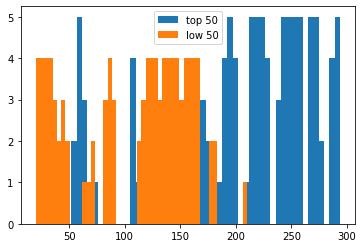

In [38]:
import matplotlib.pyplot as plt
plt.hist(ddd.sort_values(by="error")[[
    'index', "speed", 'timestamp', "ETA", "error", 'remained_distance'
]].head(100).index.values,
         bins=50, label="top 50")
plt.hist(ddd.sort_values(by="error")[[
    'index', "speed", 'timestamp', "ETA", "error", 'remained_distance'
]].tail(100).index.values,
         bins=50, label="low 50")
plt.legend()
plt.show()

In [39]:
ddd.sort_values(by="error")[[
    'index', "speed", 'timestamp', "ETA", "error", 'remained_distance'
]].iloc[50]

index                                       421
speed                                      14.9
timestamp            2022-11-21 06:47:56.403448
ETA                  2022-11-21 17:14:56.403448
error                    0 days 00:24:46.296537
remained_distance                    235.637305
Name: 197, dtype: object

In [40]:
ddd.sort_values(by="error", ascending=False)[[
    'index', "speed", 'timestamp', "ETA", "error", 'remained_distance'
]].iloc[50]

index                                       368
speed                                      15.8
timestamp            2022-11-21 01:14:55.019716
ETA                  2022-11-21 20:33:55.019716
error                    0 days 03:43:44.912805
remained_distance                    298.963707
Name: 144, dtype: object

3. 속도 계수를 조정해보자.
- 속도 계수를 적용 안했을 때
- 속도 계수를 지금과 같이 적용했을 때
- 속도 계수를 특성에 맞게 조금씩 다르게 (뒷 부분은 속도 적용하지 않는다던가 등)
- 현재 순간 속도를 보는게 아니라, 일정 시간(약 30분 ~ 60분? 실험 필요)을 두고 평균 속도나 칼만 필터를 이용한 filtered 속도를 기반으로 속도 계수 조정
    - 속도가 그렇게 차이가 없을 것 같아 별 차이는 없을지도 모름.
- 너무 속도 변화가 크거나 속도가 낮을때 제외하는 방법
- 속도가 0일때는 어떻게 계산?


# 감속률 미적용

In [41]:
sample = pd.read_csv("voy_path/COSCO_FOS_VRKR6_25.csv")
sample.sort_values(by="timestamp", ignore_index=True, inplace=True)
for idx in sample.index:
    LONGITUDE = sample.loc[idx, "longitude"]
    LATITUDE = sample.loc[idx, "latitude"]
    heading = sample.loc[idx, "heading"]
    speed = sample.loc[idx, "speed"]
    if Point(LONGITUDE, LATITUDE).within(poly) and heading < 200 and speed > 11:
        print(idx)
        break
sample = sample.loc[idx:,]
sample.reset_index(inplace=True)


224


In [42]:
def cal_duration(speed, distance):
    hour = int(distance // km_h)
    minute = int(
        (distance / km_h - distance // km_h) * 60)
    duration = datetime.timedelta(hours=hour,minutes=minute)
    return duration

In [43]:
# 억까 방지
busan_berth = '128.7362432822305,34.91571835540296,5.941836244531453 128.8816505843355,34.93956159255044,9.088787041386029 128.8718190496849,35.09310779849003,8.308118991212194 128.7247817257968,35.08647052441917,-9.228016031556635 128.7362432822305,34.91571835540296,5.941836244531453'
coord_list = busan_berth.split(" ")
coord_list
coord_list2 = []
for i in coord_list:
    temp = i.split(",")[:2]
    temp = list(map(float, temp))
    coord_list2.append(temp)
poly_busan = Polygon(coord_list2)
# if Point(LONGITUDE, LATITUDE).within(poly):

In [44]:
# ATA 확인
def check_ATA(df_test):
    for i in df_test.index:
        LONGITUDE = df_test.loc[i, 'longitude']
        LATITUDE = df_test.loc[i, 'latitude']
        if Point(LONGITUDE, LATITUDE).within(poly_busan):    
            stop_index = i - 1
            break
            continue
    return stop_index

In [45]:
sample

,index,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption
0,224,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,117.8339,38.9635,11.5,101.0,2022-11-19 22:24:43.599696,2022-11-19 13:20:25,2022-11-19 01:07:06,under way using engine,1071.303386,1386.146465
1,225,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,117.8521,38.9608,11.6,102.0,2022-11-19 22:29:46.266674,2022-11-19 13:25:02,2022-11-19 01:07:06,under way using engine,1069.727209,1388.920303
2,226,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,117.8962,38.9541,11.5,101.0,2022-11-19 22:39:53.134121,2022-11-19 13:35:45,2022-11-19 01:31:06,under way using engine,1065.901997,1379.157672
3,227,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,117.9377,38.9484,11.6,102.0,2022-11-19 22:49:57.626655,2022-11-19 13:46:03,2022-11-19 01:49:08,under way using engine,1062.327066,1379.312051
4,228,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,117.9571,38.9454,11.6,102.0,2022-11-19 22:55:01.041397,2022-11-19 13:50:45,2022-11-19 01:49:08,under way using engine,1060.642543,1377.124888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,528,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,128.8286,35.0767,0.9,80.0,2022-11-21 18:05:52.289081,2022-11-21 08:45:01,2022-11-21 08:37:08,under way using engine,11.938104,105.884565
305,529,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,128.8303,35.0770,0.1,91.0,2022-11-21 20:12:03.039219,2022-11-21 10:46:03,2022-11-21 10:49:07,moored,11.983151,956.161110
306,530,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,128.8302,35.0772,0.0,91.0,2022-11-21 20:17:05.890117,2022-11-21 10:52:05,2022-11-21 10:55:06,moored,12.004568,NaN
307,531,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,128.8300,35.0772,0.0,91.0,2022-11-21 20:42:20.130436,2022-11-21 11:15:59,2022-11-21 11:13:06,moored,12.003097,NaN


In [46]:
stop_index = check_ATA(sample)

In [47]:
stop_index

295

In [48]:
sample.loc[stop_index:]

,index,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption
295,519,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,128.8326,34.9308,9.7,345.0,2022-11-21 16:50:10.106911,2022-11-21 07:29:14,2022-11-21 07:25:09,under way using engine,4.477744,5.594956
296,520,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,128.8316,34.9334,9.7,345.0,2022-11-21 16:55:12.370789,2022-11-21 07:30:20,2022-11-21 07:31:07,under way using engine,4.174799,5.216425
297,521,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,128.8109,34.9799,11.9,343.0,2022-11-21 17:10:24.772941,2022-11-21 07:46:50,2022-11-21 07:49:08,under way using engine,1.385139,1.818734
298,522,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,128.7941,35.0195,12.4,341.0,2022-11-21 17:20:26.867541,2022-11-21 08:00:05,2022-11-21 07:49:08,under way using engine,6.009961,8.060099
299,523,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,128.7889,35.0318,10.6,341.0,2022-11-21 17:25:29.125227,2022-11-21 08:04:23,2022-11-21 07:49:08,under way using engine,7.455118,9.412492
300,524,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,128.7868,35.0597,8.2,25.0,2022-11-21 17:35:35.996969,2022-11-21 08:15:14,2022-11-21 08:13:09,under way using engine,10.450602,13.357489
301,525,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,128.7908,35.0657,8.0,53.0,2022-11-21 17:40:38.692701,2022-11-21 08:18:19,2022-11-21 08:13:09,under way using engine,10.999747,14.165268
302,526,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,128.8049,35.0702,7.1,75.0,2022-11-21 17:45:41.601632,2022-11-21 08:24:32,2022-11-21 08:13:09,under way using engine,11.264421,15.235716
303,527,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,128.8218,35.0740,3.9,69.0,2022-11-21 17:55:45.279861,2022-11-21 08:34:22,2022-11-21 08:13:09,under way using engine,11.610739,24.556266
304,528,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,128.8286,35.0767,0.9,80.0,2022-11-21 18:05:52.289081,2022-11-21 08:45:01,2022-11-21 08:37:08,under way using engine,11.938104,105.884565


In [49]:
ATA = pd.to_datetime(sample.loc[stop_index,"timestamp"])
ATA

Timestamp('2022-11-21 16:50:10.106911')

In [50]:
# 샘플 데이터는 20부터. 
for sam in sample.index[20:stop_index]:
    re_sample = sample.loc[sam,:]
    longitude = re_sample["longitude"]
    latitude = re_sample["latitude"]
    current_point = (latitude, longitude)
    current_speed = re_sample["speed"]
    current_timestamp = re_sample["timestamp"]
    current_timestamp = pd.to_datetime(current_timestamp)
    
    # 현재 위치에서 가장 짧은 segment 찾기
    shortest_distance = 999
    for i in range(len(segmenting_index_list)):
        d = pd.read_csv(f"실험/segment_test_new_{i}.csv")
        for idx in d.index:

            LONGITUDE = d.loc[idx, "longitude"]
            LATITUDE = d.loc[idx, "latitude"]

            ais_point = (LATITUDE, LONGITUDE)
            distance = haversine(current_point, ais_point, unit="km")
            # 가장 짧은 segment 간의 거리, segment 번호, 인덱스 저장
            if distance < shortest_distance:
                shortest_distance = distance 
                shortest_point_idx = d.loc[idx, "index"]
                seg_no = i
#     print(shortest_distance)
    # 마지막 인덱스 제외
    if shortest_point_idx == df_test_2.loc[df_test_2.index[-1],"index"]:
        continue
        
    # 가장 가까운 점에서 다음 점 (n+1) 선택. 
    # n+1 점과 현재 점
    df__ = df_test_2.query(f'index == {shortest_point_idx + 1}')
    new_point = (df__["latitude"].values[0],df__["longitude"].values[0])
    distance = haversine(current_point, new_point, unit="km")
    km_h = current_speed * 1.852
    init_duration = cal_duration(km_h, distance)
    
    # 가장 가까운 segment 데이터 불러오기
    init_seg_df = pd.read_csv(f"실험/segment_test_new_{seg_no}.csv")
    # 마지막 세그먼트라면 제외
    if len(init_seg_df.query(f'index == {shortest_point_idx + 1}')) == 0:
        init_seg_df = pd.read_csv(f"실험/segment_test_new_{seg_no + 1}.csv")
        starting_index = init_seg_df.index[0]
    else:
        starting_index = init_seg_df.query(f'index == {shortest_point_idx + 1}').index[0]
        
    # 감속률 계산
    speed_damping_ratio = 1
    
    # 남은 segment 간의 거리 계산 
    remained_init_seg_df = init_seg_df.loc[starting_index:,]
    remained_init_seg_df.reset_index(drop=True, inplace=True)
    accu_distance = 0
    for idx in remained_init_seg_df.index:
        if idx != 0:
            LONGITUDE = remained_init_seg_df.loc[idx, "longitude"]
            LATITUDE = remained_init_seg_df.loc[idx, "latitude"]
            current_coord = (LATITUDE, LONGITUDE)

            LONGITUDE = remained_init_seg_df.loc[idx - 1, "longitude"]
            LATITUDE = remained_init_seg_df.loc[idx - 1, "latitude"]
            previous_current_coord = (LATITUDE, LONGITUDE)

            accu_distance += haversine(current_coord, previous_current_coord, unit="km")
    # 첫번쨰 segment duration 계산
    duration_0 = cal_duration(km_h, accu_distance)
    duration_0 = duration_0 + init_duration
    
    # 나머지 segment 계산
    # 억까 방지를 위해 접안 과정에 찍힌 AIS 데이터는 제외. 
    
    for i in df_test.index:
        LONGITUDE = df_test.loc[i, 'longitude']
        LATITUDE = df_test.loc[i, 'latitude']
        if Point(LONGITUDE, LATITUDE).within(poly_busan):    
            stop_index = i - 1
    #         print(i)
            break
#         print(stop_index)

    # 나머지 segments의 durations 계산
    dura_list = []
    # 첫 segment 부터 
    for i in range(seg_no, len(segmenting_index_list)):
        d = pd.read_csv(f"실험/segment_test_new_{i}.csv")
        # 억까 index가 들어가있으면 for 문 으로 뒷부분 삭제 계산 break로 나가기 
        if d.loc[d.index[-1],"index"] > stop_index:
            for i2 in d.index:
                d_index = d.loc[i2, "index"]
                if d_index > stop_index:
                    d = d.loc[:i2,:]
                    break
        # 뒷부분이 삭제되면 오류가 나기때문에 len()이 0이 아니라면,
        if len(d) != 0:
            mean_speed = d["speed"].mean()
            damped_mean_speed = mean_speed * speed_damping_ratio
            km_h = damped_mean_speed * 1.852
            distance = reckon_point_lengths(d)
            # 걸리는 시간 list에 저장
            dura_list.append(cal_duration(km_h, distance))
    accu_timedelta = datetime.timedelta(minutes=0)
    for i in dura_list:
        accu_timedelta += i
    # 현재 시간 + duration = ETA
    ETA = current_timestamp + accu_timedelta
    sample.loc[sam, 'ETA'] = ETA
    # ATA 저장. ATA는 ATA = pd.to_datetime('2022-11-14 16:00:40.036669')
    sample.loc[sam, 'ATA'] = ATA
    sample.loc[sam, 'error'] = abs(ETA - ATA)

In [51]:
ddd = sample.loc[20:,:]


In [52]:
ddd = ddd.loc[ddd['error'].dropna(axis=0).index]
ddd.sort_values(by="error")

,index,vessel_name,mmsi,imo,CAPACITY,destination,eta,longitude,latitude,speed,heading,timestamp,time_position_data_received,time_voyage_data_received,navigation_info,remained_distance,estimated_fuel_consumption,ETA,ATA,error
243,467,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,127.6964,34.1820,16.6,80.0,2022-11-21 10:40:06.769841,2022-11-21 01:37:03,2022-11-21 01:15:06,under way using engine,135.060999,233.783012,2022-11-21 16:51:06.769841,2022-11-21 16:50:10.106911,0 days 00:00:56.662930
132,356,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,125.4166,35.1281,15.3,160.0,2022-11-21 00:14:15.094614,2022-11-20 15:14:02,2022-11-20 02:37:09,under way using engine,310.251483,491.323001,2022-11-21 16:51:15.094614,2022-11-21 16:50:10.106911,0 days 00:01:04.987703
154,378,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,125.5613,34.6735,16.6,177.0,2022-11-21 02:05:17.249550,2022-11-20 17:04:51,2022-11-20 02:37:09,under way using engine,299.219656,517.932437,2022-11-21 16:51:17.249550,2022-11-21 16:50:10.106911,0 days 00:01:07.142639
216,440,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,126.9755,34.0715,16.0,96.0,2022-11-21 08:23:49.949162,2022-11-20 23:21:33,2022-11-20 02:37:09,under way using engine,196.239474,325.801039,2022-11-21 16:51:49.949162,2022-11-21 16:50:10.106911,0 days 00:01:39.842251
271,495,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,128.3946,34.3806,15.6,55.0,2022-11-21 13:01:26.769715,2022-11-21 03:50:28,2022-11-21 03:37:06,under way using engine,76.149850,123.032177,2022-11-21 16:48:26.769715,2022-11-21 16:50:10.106911,0 days 00:01:43.337196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,311,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,124.6256,36.0290,19.3,145.0,2022-11-20 20:27:07.805300,2022-11-20 11:26:17,2022-11-20 04:13:11,under way using engine,397.469666,836.073157,2022-11-21 22:44:07.805300,2022-11-21 16:50:10.106911,0 days 05:53:57.698389
88,312,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,124.6383,36.0138,19.4,145.0,2022-11-20 20:32:10.509263,2022-11-20 11:29:40,2022-11-20 04:13:11,under way using engine,395.907662,838.895501,2022-11-21 22:49:10.509263,2022-11-21 16:50:10.106911,0 days 05:59:00.402352
89,313,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,124.6560,35.9923,19.5,145.0,2022-11-20 20:37:13.356259,2022-11-20 11:34:28,2022-11-20 04:13:11,under way using engine,393.727911,840.395499,2022-11-21 22:54:13.356259,2022-11-21 16:50:10.106911,0 days 06:04:03.249348
90,314,COSCO FOS,477947700,9484302.0,4253,KRBNP,2022-11-21 08:00:00,124.6784,35.9651,19.7,145.0,2022-11-20 20:42:16.400753,2022-11-20 11:40:28,2022-11-20 04:13:11,under way using engine,390.981343,846.816672,2022-11-21 22:59:16.400753,2022-11-21 16:50:10.106911,0 days 06:09:06.293842


In [53]:
ddd['error'].mean()

Timedelta('0 days 01:02:48.807614480')

In [54]:
ddd['error'].max()

Timedelta('0 days 06:14:08.822252')

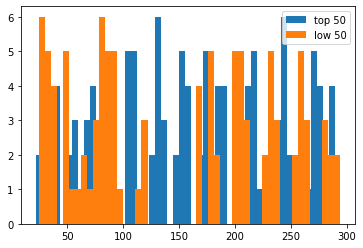

In [55]:
import matplotlib.pyplot as plt
plt.hist(ddd.sort_values(by="error")[[
    'index', "speed", 'timestamp', "ETA", "error", 'remained_distance'
]].head(100).index.values,
         bins=50, label="top 50")
plt.hist(ddd.sort_values(by="error")[[
    'index', "speed", 'timestamp', "ETA", "error", 'remained_distance'
]].tail(100).index.values,
         bins=50, label="low 50")
plt.legend()
plt.show()

In [56]:
ddd.sort_values(by="error")[[
    'index', "speed", 'timestamp', "ETA", "error", 'remained_distance'
]].iloc[50]

index                                       437
speed                                      15.2
timestamp            2022-11-21 08:08:41.839945
ETA                  2022-11-21 16:36:41.839945
error                    0 days 00:13:28.266966
remained_distance                    201.747847
Name: 213, dtype: object

In [57]:
ddd.sort_values(by="error", ascending=False)[[
    'index', "speed", 'timestamp', "ETA", "error", 'remained_distance'
]].iloc[50]

index                                       458
speed                                      16.4
timestamp            2022-11-21 09:54:41.162600
ETA                  2022-11-21 18:22:41.162600
error                    0 days 01:32:31.055689
remained_distance                    155.940153
Name: 234, dtype: object